## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
poll = pd.read_csv('poll.csv')

In [6]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
poll.head(3)

,vote
0,Brown
1,Green
2,Brown


In [8]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [9]:
# Although the above seems to indicate Brown
# will remain mayor; the results rely on who
# is polled (re: sampling variability)

In [28]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [29]:
s = sample(0.51, n=1000)

In [30]:
s.vote.value_counts(normalize=True)

Green    0.512
Brown    0.488
Name: vote, dtype: float64

In [31]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [32]:
dist.head()

,Brown,Green
vote,0.505,0.495
vote,0.494,0.506
vote,0.546,0.454
vote,0.518,0.482
vote,0.527,0.473


<AxesSubplot:>

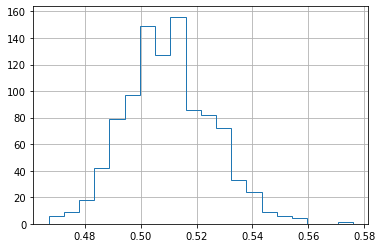

In [33]:
dist.Brown.hist(histtype="step", bins=20)

#### Confidence interval

- Contains the true value of a population paramater xx% of the time

- The confidence interval can be selected, then calculated

In [48]:
def sampling_dist(brown, n=1000):
    return pd.DataFrame([sample(brown, n).vote.value_counts(normalize=True) for i in range(1000)])

In [49]:
def quantiles(brown, n=1000):
    dist = sampling_dist(brown, n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [50]:
quantiles(0.50)

(0.469, 0.534)

In [54]:
quantiles(0.48)

(0.448975, 0.512)

In [53]:
quantiles(0.54)

(0.509, 0.571)

In [55]:
## So for an observed sample, proportion of .51
## when the sample size is 1000 the 95 confidence
## interval for the true population is .48 to .54

#### Results:

95% confidence interval: [0.48, 0.54]
<br>
Estimate = 0.51 +/- 0.03 (at 95% confidence)
<br>
<br>
> `0.51` is the **Point estimate** <br>
> `0.03` is the **Margin of error**

In [58]:
dist = sampling_dist(0.50, 10000)

<AxesSubplot:>

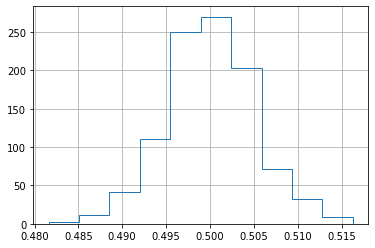

In [60]:
dist.Brown.hist(histtype='step')

In [61]:
largepoll = pd.read_csv('poll-larger.csv')

In [62]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64